In [187]:
import io
import requests
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv('fatigueDataset.csv')
df

,datetime,program,perclos,fatigue,person,bpm
0,2021-08-06 18:53:33.609532,Visual Studio,0.422811,0.383772,personA,99
1,2021-08-06 18:54:33.609532,Visual Studio,0.412555,0.427226,personA,88
2,2021-08-06 18:55:33.609532,Visual Studio,0.424685,0.461179,personA,87
3,2021-08-06 18:56:33.609532,Visual Studio,0.422954,0.434437,personA,95
4,2021-08-06 18:57:33.609532,Visual Studio,0.411426,0.390071,personA,85
...,...,...,...,...,...,...
161996,2022-06-02 18:49:33.609532,Outlook,0.823962,0.781178,personA,41
161997,2022-06-02 18:50:33.609532,Outlook,0.809412,0.823738,personA,43
161998,2022-06-02 18:51:33.609532,Outlook,0.840213,0.888510,personA,50
161999,2022-06-02 18:52:33.609532,Teams,0.855776,0.891662,personA,49


In [189]:
df['datetime'] = pd.to_datetime(df['datetime'])
possibleApplications = ["Outlook", "Teams", "Visual Studio Code", "Visual Studio", "Google Chrome"]
df['programNumber'] = df['program'].map({'Outlook':0, 'Teams':1 , "Visual Studio Code":2 , "Visual Studio":3 , "Google Chrome":4})

def calc_new_col(row):
   return row["datetime"].weekday()

def calc_new_col2(row):
   now  = row["datetime"]
   return (now - now.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()

df["dayOfWeek"] = df.apply(calc_new_col, axis=1)
df["timeOfDay"] = df.apply(calc_new_col2, axis=1)




df = df.set_index('datetime')
df

,program,perclos,fatigue,person,bpm,programNumber,dayOfWeek,timeOfDay
datetime,,,,,,,,
2021-08-06 18:53:33.609532,Visual Studio,0.422811,0.383772,personA,99,3,4,68013.609532
2021-08-06 18:54:33.609532,Visual Studio,0.412555,0.427226,personA,88,3,4,68073.609532
2021-08-06 18:55:33.609532,Visual Studio,0.424685,0.461179,personA,87,3,4,68133.609532
2021-08-06 18:56:33.609532,Visual Studio,0.422954,0.434437,personA,95,3,4,68193.609532
2021-08-06 18:57:33.609532,Visual Studio,0.411426,0.390071,personA,85,3,4,68253.609532
...,...,...,...,...,...,...,...,...
2022-06-02 18:49:33.609532,Outlook,0.823962,0.781178,personA,41,0,3,67773.609532
2022-06-02 18:50:33.609532,Outlook,0.809412,0.823738,personA,43,0,3,67833.609532
2022-06-02 18:51:33.609532,Outlook,0.840213,0.888510,personA,50,0,3,67893.609532


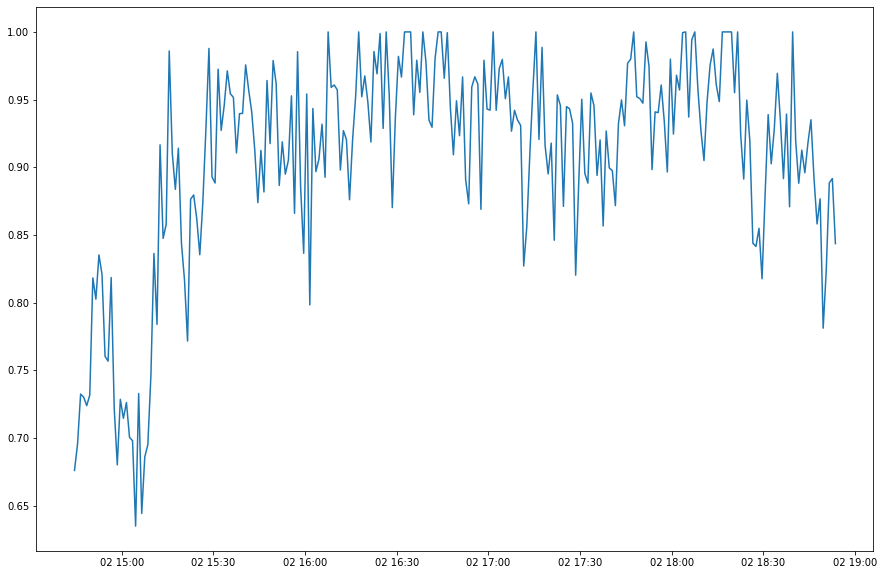

In [190]:
f, ax = plt.subplots(figsize=(15,10))
plt.plot( df.index[-250:], df['fatigue'][-250:] )

In [191]:
df['fatigue'].describe()

count    162001.000000
mean          0.504997
std           0.279991
min           0.000031
25%           0.259561
50%           0.504991
75%           0.744720
max           1.000000
Name: fatigue, dtype: float64

feature extraction

<AxesSubplot:>

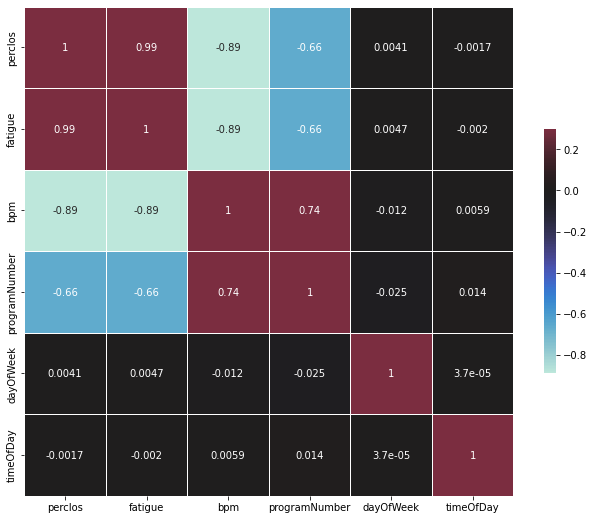

In [192]:

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [193]:
df = df.drop(["program"], axis=1)
df = df.drop(["person"], axis=1)

In [194]:

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [195]:
training_set = df.head(int(len(df)*0.7))
test_set = df.head(int(len(df)*-0.29))
training_set

,perclos,fatigue,bpm,programNumber,dayOfWeek,timeOfDay
datetime,,,,,,
2021-08-06 18:53:33.609532,0.422811,0.383772,99,3,4,68013.609532
2021-08-06 18:54:33.609532,0.412555,0.427226,88,3,4,68073.609532
2021-08-06 18:55:33.609532,0.424685,0.461179,87,3,4,68133.609532
2021-08-06 18:56:33.609532,0.422954,0.434437,95,3,4,68193.609532
2021-08-06 18:57:33.609532,0.411426,0.390071,85,3,4,68253.609532
...,...,...,...,...,...,...
2022-03-04 18:48:33.609532,0.202572,0.229157,99,3,4,67713.609532
2022-03-04 18:49:33.609532,0.224521,0.176389,95,3,4,67773.609532
2022-03-04 18:50:33.609532,0.179887,0.173311,82,3,4,67833.609532


In [196]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
training_set_scaled

array([[0.42274697, 0.38374234, 0.98333333, 0.75      , 0.66666667,
        0.98886827],
       [0.41248943, 0.42719813, 0.8       , 0.75      , 0.66666667,
        0.99072356],
       [0.42462069, 0.46115323, 0.78333333, 0.75      , 0.66666667,
        0.99257885],
       ...,
       [0.17979562, 0.17327026, 0.7       , 0.75      , 0.66666667,
        0.98330241],
       [0.14895274, 0.14157637, 0.85      , 0.75      , 0.66666667,
        0.9851577 ],
       [0.16180778, 0.16332669, 0.8       , 0.75      , 0.66666667,
        0.98701299]])

In [197]:
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, [0,2,3,4,5]])
    y_train.append(training_set_scaled[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)


In [198]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 550, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 550, return_sequences = True))
model.add(Dropout(0.6))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 450, return_sequences = True))
model.add(Dropout(0.6))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 400))
model.add(Dropout(0.6))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error' , metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.Accuracy()])


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 261ms/step - loss: 0.0987 - root_mean_squared_error: 0.3142 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 12s 499ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 12s 499ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 12s 497ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 12s 498ms/step - loss: 0.0104 - root_mean_squared_error: 0.1018 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 12s 499ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 12s 498ms/step - loss: 0.0108 - root_mean_squared_error: 0.1041 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [=

Get predictions for next day

In [ ]:
training_set_scaled = training_set_scaled[-121:]

In [ ]:
X_test = []
y_test = []
for i in range(60, len(training_set_scaled)):
    X_test.append(training_set_scaled[i-60:i, [0,2,3,4,5]])
    y_test.append(training_set_scaled[i, 1])
X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
X_test.shape

In [ ]:
predicted_fatigue = model.predict(X_test)

In [ ]:
predicted_fatigue

In [ ]:
predicted_fatigue.shape

In [ ]:
# Visualising the results
plt.plot(df.index[-61:],y_test[-61:], color = 'red', label = 'Real Fatigue')
plt.plot(df.index[-61:],predicted_fatigue, color = 'blue', label = 'Predicted Fatigue')

plt.title('Fatigue Prediction')
plt.xlabel('Time')
plt.ylabel('Fatigue')
plt.legend()
plt.show()